# ***Logistic Regression***
---

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
socialdata = pd.read_csv("Social_Network_Ads.csv")
socialdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
socialdata.drop(columns=["User ID", "Gender", "EstimatedSalary"], inplace=True)

In [8]:
socialdata.head(3)

,Age,Purchased
0,19,0
1,35,0
2,26,0


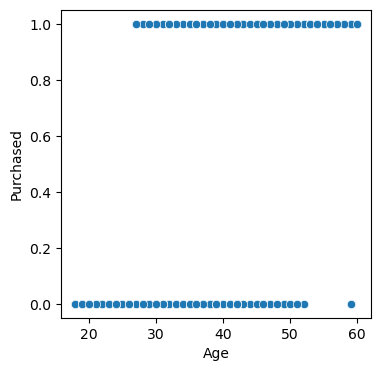

In [10]:
plt.figure(figsize=(4,4))
sns.scatterplot(x="Age", y="Purchased", data=socialdata)
plt.show()

In [11]:
x = socialdata[["Age"]]
y = socialdata[["Purchased"]]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
lr.score(x_test,y_test)*100

91.25

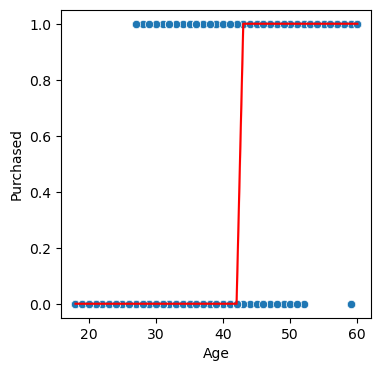

In [19]:
plt.figure(figsize=(4,4))
sns.scatterplot(x="Age", y="Purchased", data=socialdata)
sns.lineplot(x="Age", y=lr.predict(x), data=socialdata, color='red')
plt.show()

# ***Logistic Regression with multiple inputs***
---

In [13]:
import pandas as pd

# Creating the DataFrame
data = {
    'Study Hours': [2, 3, 5, 7, 8, 4, 6, 5, 3, 4, 9, 10, 3, 6, 7, 5, 8, 9, 2, 1],
    'Attendance (%)': [70, 80, 90, 85, 95, 60, 75, 85, 50, 65, 98, 90, 40, 85, 88, 80, 92, 97, 55, 45],
    'Previous GPA': [2.5, 3.0, 3.5, 3.8, 3.9, 2.8, 3.2, 3.1, 2.6, 2.9, 3.9, 3.6, 2.4, 3.5, 3.7, 3.3, 3.8, 4.0, 2.3, 2.0],
    'Assignments Completed (%)': [50, 60, 80, 90, 95, 55, 70, 85, 40, 60, 99, 92, 35, 88, 90, 83, 96, 98, 45, 30],
    'Extracurricular (1=Yes, 0=No)': [0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0],
    'Pass (1=Yes, 0=No)': [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
}

studydata = pd.DataFrame(data)
studydata.head()


,Study Hours,Attendance (%),Previous GPA,Assignments Completed (%),"Extracurricular (1=Yes, 0=No)","Pass (1=Yes, 0=No)"
0,2,70,2.5,50,0,0
1,3,80,3.0,60,1,0
2,5,90,3.5,80,1,1
3,7,85,3.8,90,1,1
4,8,95,3.9,95,0,1


In [16]:
# Rename specific columns
studydata.rename(columns={
    'Study Hours': 'Hours Studied',
    'Attendance (%)': 'Attendance Rate',
    'Previous GPA': 'GPA',
    'Assignments Completed (%)': 'Assignments Done',
    'Extracurricular (1=Yes, 0=No)': 'Extracurricular',
    'Pass (1=Yes, 0=No)': 'Pass'
}, inplace=True)

# Display the updated DataFrame
studydata.head(2)


,Hours Studied,Attendance Rate,GPA,Assignments Done,Extracurricular,Pass
0,2,70,2.5,50,0,0
1,3,80,3.0,60,1,0


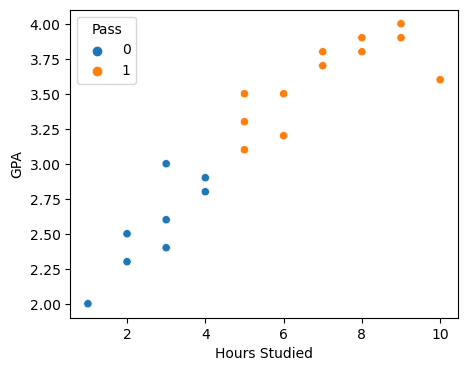

In [18]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Hours Studied", y="GPA", data=studydata, hue="Pass")
plt.show()

In [20]:
x = studydata[["Hours Studied","GPA"]]
y = studydata["Pass"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [26]:
lr.score(x_test,y_test)*100

100.0

In [30]:
lr.coef_

array([[1.39035942, 0.48164036]])

In [31]:
lr.intercept_

array([-7.69381743])

In [27]:
from mlxtend.plotting import plot_decision_regions

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


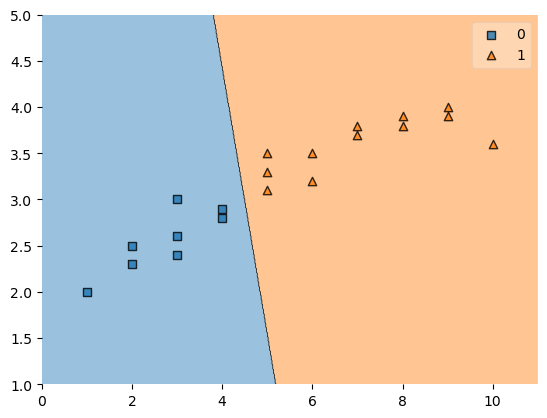

In [29]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

# ***Logistic Regression***
---

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target']= iris.target

In [8]:
new_coloumn_name = ['sepal_length', 'sepal_width','petal_length','petal_width','target']
iris_data.columns = new_coloumn_name

In [9]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris_data['target'].unique()

array([0, 1, 2])

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

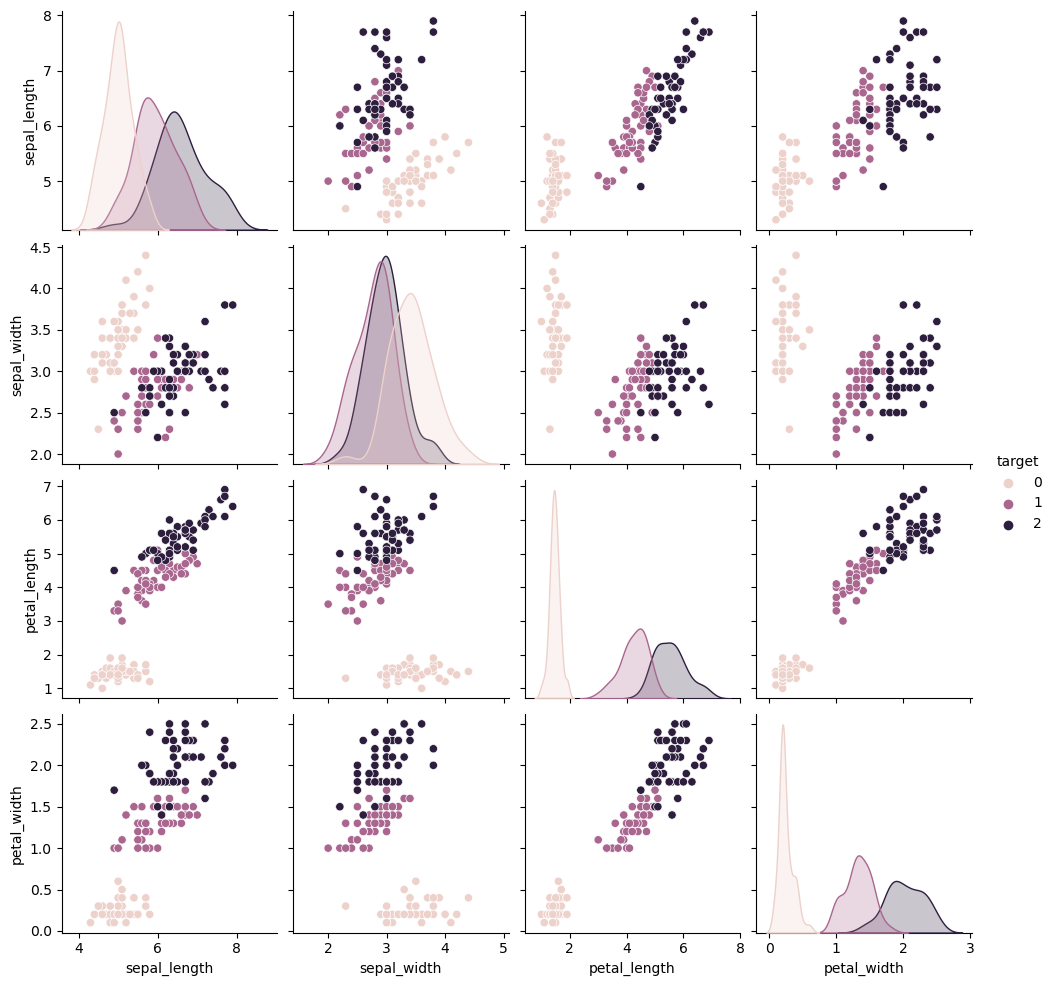

In [17]:
plt.figure(figsize=(6,5))
sns.pairplot(data=iris_data, hue='target')
plt.show()

In [20]:
x = iris_data.iloc[:,:-1]
y = iris_data['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

### ***OVR***

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [25]:
lr.score(x_test,y_test)*100

96.66666666666667

### ***Multinomial***

In [27]:
lr = LogisticRegression(multi_class="multinomial")
lr.fit(x_train, y_train)
lr.score(x_test,y_test)*100

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0

# ***Confusion Matrics***
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
placementdata = pd.read_csv('Placement2.csv')

In [3]:
placementdata.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [4]:
placementdata = placementdata.drop(columns=['Student_ID'])

In [5]:
placementdata.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [6]:
x = placementdata.iloc[:,:-1]
y = placementdata["Placement"]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [9]:
lr.score(x_test,y_test)*100

85.0

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [12]:
cf = confusion_matrix(y_test, lr.predict(x_test))
cf

array([[9, 1],
       [2, 8]], dtype=int64)

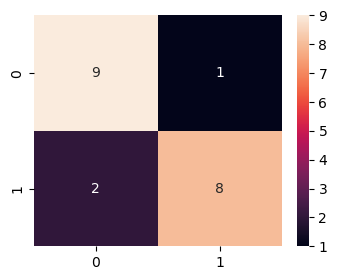

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(cf, annot=True)
plt.show()

In [16]:
precision_score(y_test, lr.predict(x_test))*100

88.88888888888889

In [17]:
recall_score(y_test, lr.predict(x_test))*100

80.0

In [18]:
f1_score(y_test, lr.predict(x_test))*100

84.21052631578948